In [0]:
from pyspark.sql.functions import col, to_timestamp, hour, count, avg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#access key
spark.conf.set(
  "fs.azure.account.key.storageaccount9613.dfs.core.windows.net",
  "XvCGvmbsEeJ4hjnQ7D3xUAxNMQznhaW6o8UhOXpBTFmxxOZtPhHenywE2Z3qmUYlup6bazd/9glE+AStAsXwjA=="
)

#load the table 
df = spark.read.format("delta").load("abfss://fraud-detection-container@storageaccount9613.dfs.core.windows.net/fraud_data")

#show schema and sample
df.printSchema()
df.show(5)

root
 |-- transaction_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- amount: double (nullable = true)
 |-- merchant_id: string (nullable = true)
 |-- location: string (nullable = true)
 |-- timestamp: string (nullable = true)

+--------------+-------+------+-----------+--------+-------------------+
|transaction_id|user_id|amount|merchant_id|location|          timestamp|
+--------------+-------+------+-----------+--------+-------------------+
|    txn_148141|user_47|236.52|     Target|      MA|2025-06-20 01:27:52|
|    txn_665672|user_13|225.36|      Exxon|      MA|2025-06-20 01:27:52|
|    txn_771417|user_30|172.84|     Amazon|      CT|2025-06-20 01:27:52|
|    txn_840626| user_3|179.71|     Costco|      NY|2025-06-20 01:27:52|
|    txn_742723|user_23| 82.65|      Exxon|      NY|2025-06-20 01:27:52|
+--------------+-------+------+-----------+--------+-------------------+
only showing top 5 rows



In [0]:
#check null values - since we are generating data we know that there should be no NULL values, but good practice
df.select([count(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

+--------------+-------+------+-----------+--------+---------+
|transaction_id|user_id|amount|merchant_id|location|timestamp|
+--------------+-------+------+-----------+--------+---------+
|          1565|   1565|  1565|       1565|    1565|     1565|
+--------------+-------+------+-----------+--------+---------+



In [0]:
#stats for amount
df.select("amount").describe().show()

+-------+------------------+
|summary|            amount|
+-------+------------------+
|  count|              1565|
|   mean| 350.2966773162939|
| stddev|1158.5110815003147|
|    min|              5.21|
|    max|           9970.11|
+-------+------------------+



In [0]:
#convert df to pandas
pdf = df.toPandas()

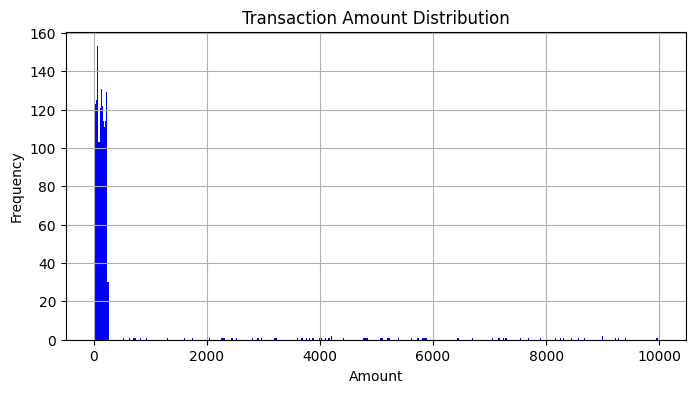

In [0]:
#Transaction Amount Distribution
plt.figure(figsize=(8, 4))
plt.hist(pdf["amount"], bins = 500, color = "blue")
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

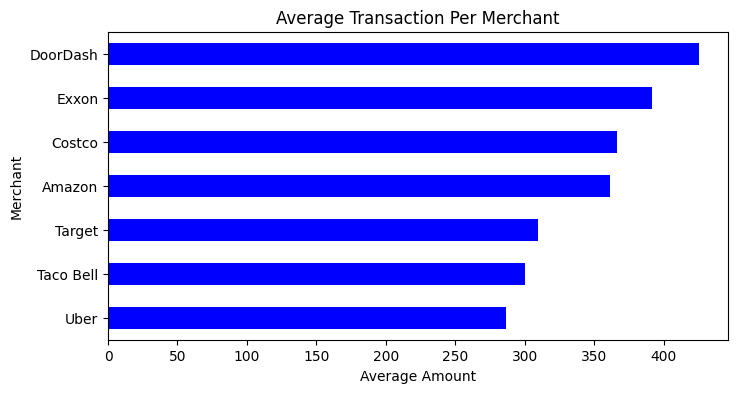

In [0]:
#Plot the Average Transaction Per Merchant
merchant_avg = pdf.groupby("merchant_id")["amount"].mean().sort_values()
merchant_avg.plot(kind = "barh", color = "blue", figsize = (8, 4))
plt.title("Average Transaction Per Merchant")
plt.xlabel("Average Amount")
plt.ylabel("Merchant")
plt.show()

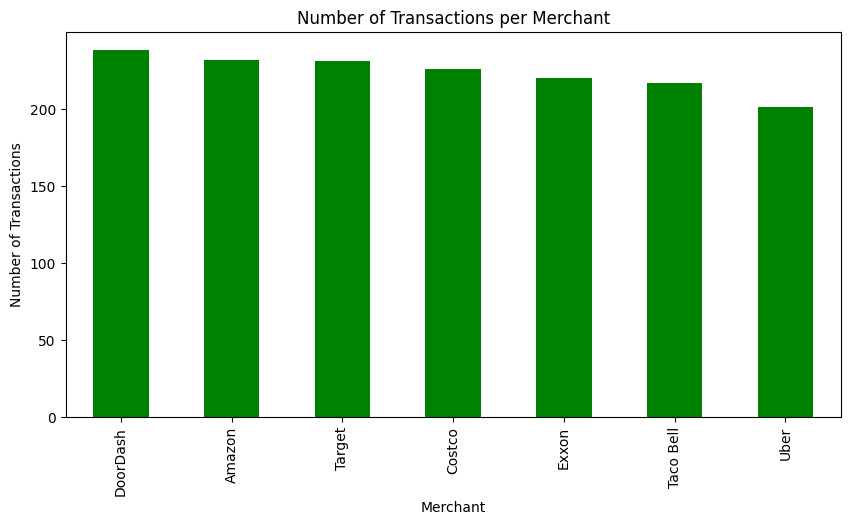

In [0]:
#Plot the number of Transactions per Merchant
pdf["merchant_id"].value_counts().plot(kind="bar", figsize=(10, 5), color="green")
plt.title("Number of Transactions per Merchant")
plt.xlabel("Merchant")
plt.ylabel("Number of Transactions")
plt.show()

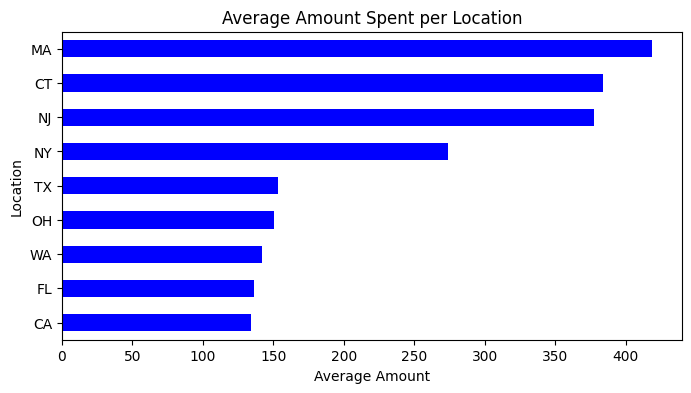

In [0]:
#Plot the Average Amount Spent per Location
location_avg = pdf.groupby("location")["amount"].mean().sort_values()
location_avg.plot(kind = "barh", color = "blue", figsize = (8, 4))
plt.title("Average Amount Spent per Location")
plt.xlabel("Average Amount")
plt.ylabel("Location")
plt.show()

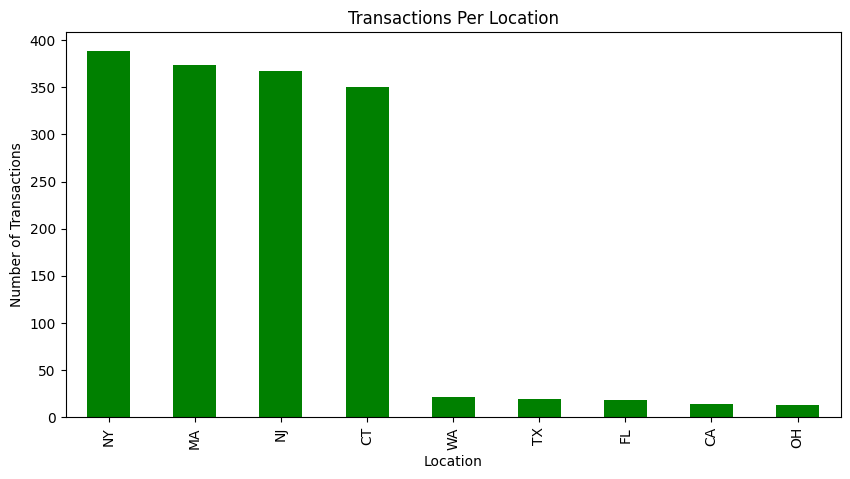

In [0]:
#Transactions Per Location
pdf["location"].value_counts().plot(kind="bar", figsize=(10, 5), color="green")
plt.title("Transactions Per Location")
plt.xlabel("Location")
plt.ylabel("Number of Transactions")
plt.show()

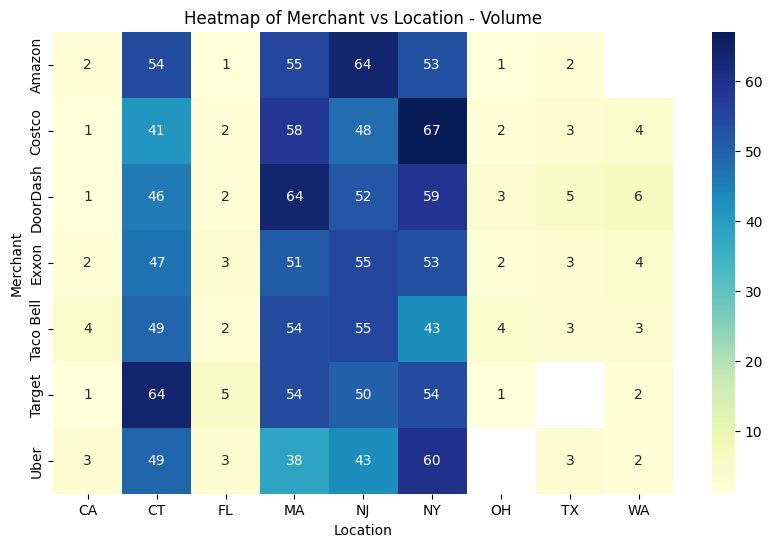

In [0]:
#Heatmap of Merchant vs Location - Volume
pivot_volume = pd.pivot_table(pdf, values = "amount", index = "merchant_id", columns = "location", aggfunc = "count")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_volume, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Heatmap of Merchant vs Location - Volume")
plt.xlabel("Location")
plt.ylabel("Merchant")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

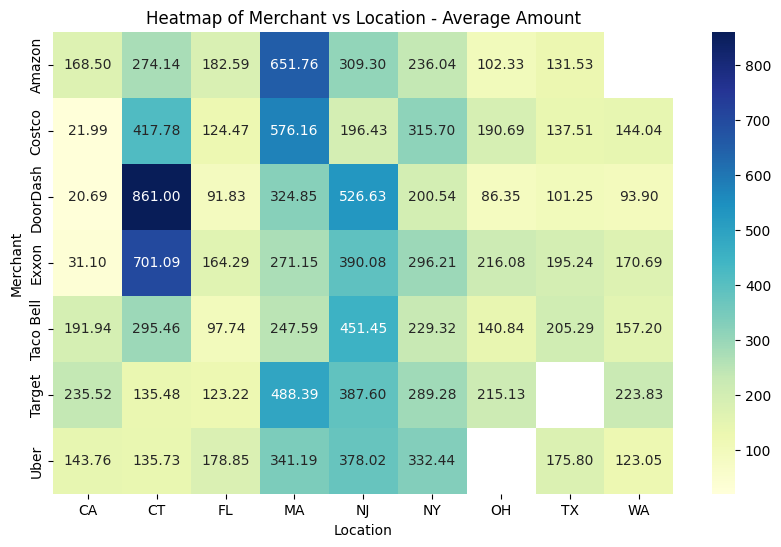

In [0]:
#Heatmap of Merchant vs Location - Average Amount   
pivot_avg = pd.pivot_table(pdf, values = "amount", index = "merchant_id", columns = "location", aggfunc = "mean")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_avg, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Heatmap of Merchant vs Location - Average Amount")
plt.xlabel("Location")
plt.ylabel("Merchant")
plt.show  